In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
dataset1=pd.read_csv("prep.csv",index_col=None)
df2=dataset1
df2 = pd.get_dummies(df2, drop_first=True,dtype=int)
indep_X=df2.drop('classification_yes',axis= 1)
dep_Y=df2['classification_yes']


In [3]:
df2

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,0,0,0,0,0,0,1,1,0,1
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,1,0,0,0,0,0,1,0,0,1
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,1,0,0,0,0,0,1,0,0,1
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,1,0,0,0,0,0,1,0,1,1
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,1,0,0,0,0,0,1,0,0,1
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,1,0,0,1,1,0,1,0,1,1
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,1,0,0,1,1,0,0,0,0,1
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,1,0,0,1,1,0,1,0,1,1


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.3, random_state=42)


In [9]:
#Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
#Fit the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
#Get feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


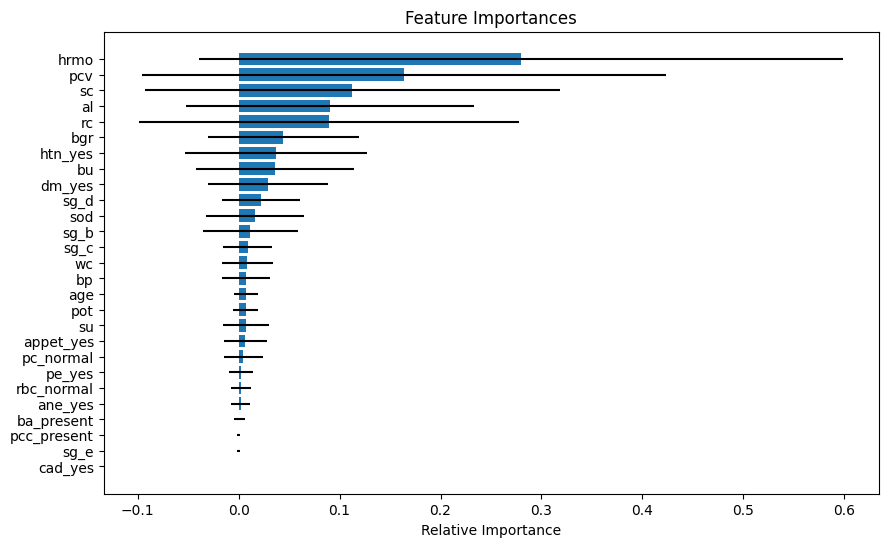

In [14]:
# Create a bar plot to visualize the feature importance
#Check if X is still a DataFrame, otherwise use feature names manually
if isinstance(indep_X, pd.DataFrame):
    features =indep_X.columns
else:
    features = [f"Feature {i}" for i in range(X.shape[1])]  # Manually create feature names
#Sort the feature importances in descending order and plot
indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(indep_X.shape[1]), importances[indices], xerr=std[indices], align="center")
plt.yticks(range(indep_X.shape[1]), [features[i] for i in indices])  # Use list comprehension to reorder features
plt.xlabel("Relative Importance")
plt.show()


In [15]:
 # Print feature importances
 print("Feature Importances:")
for feature, importance in zip([features[i] for i in indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")




Feature Importances:
cad_yes: 0.0000
sg_e: 0.0001
pcc_present: 0.0002
ba_present: 0.0009
ane_yes: 0.0021
rbc_normal: 0.0023
pe_yes: 0.0027
pc_normal: 0.0048
appet_yes: 0.0066
su: 0.0072
pot: 0.0072
age: 0.0072
bp: 0.0075
wc: 0.0088
sg_c: 0.0089
sg_b: 0.0117
sod: 0.0165
sg_d: 0.0226
dm_yes: 0.0289
bu: 0.0360
htn_yes: 0.0369
bgr: 0.0444
rc: 0.0895
al: 0.0904
sc: 0.1128
pcv: 0.1640
hrmo: 0.2797
